In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Read in L, M and Href

In [3]:
path = 'G:/My Drive/Data/data/20240530 modifying triple silac/protein_groups'

In [46]:
light = pd.read_csv(f'{path}/light.csv', sep=',')
nsp = pd.read_csv(f'{path}/nsp.csv', sep=',')
#href = pd.read_csv(f'{path}/href.csv', sep=',')

In [53]:
def summarize_data(df):
    df_counts = df.notna().sum()[1:]
    
    df_cols = df.columns.values.tolist()
    df_cols = df_cols[1:]
    
    df_intensity = df.iloc[:,1:].sum(skipna=True)    
    df_intensity = df_intensity.reset_index()
    df_intensity.columns = ['Experiment', 'Total Intensity']
    df_intensity = df_intensity['Total Intensity'].values.tolist()
    
    summarize_df = {'experiment':df_cols,
                     'counts':df_counts,
                      'total_intensity': df_intensity}

    summarize_df = pd.DataFrame(summarize_df)
    return summarize_df

In [57]:
light_summarize = summarize_data(light)
light_summarize['channel'] = 'light'
nsp_summarize = summarize_data(nsp)
nsp_summarize['channel'] = 'nsp'

df = pd.concat([light_summarize, nsp_summarize])

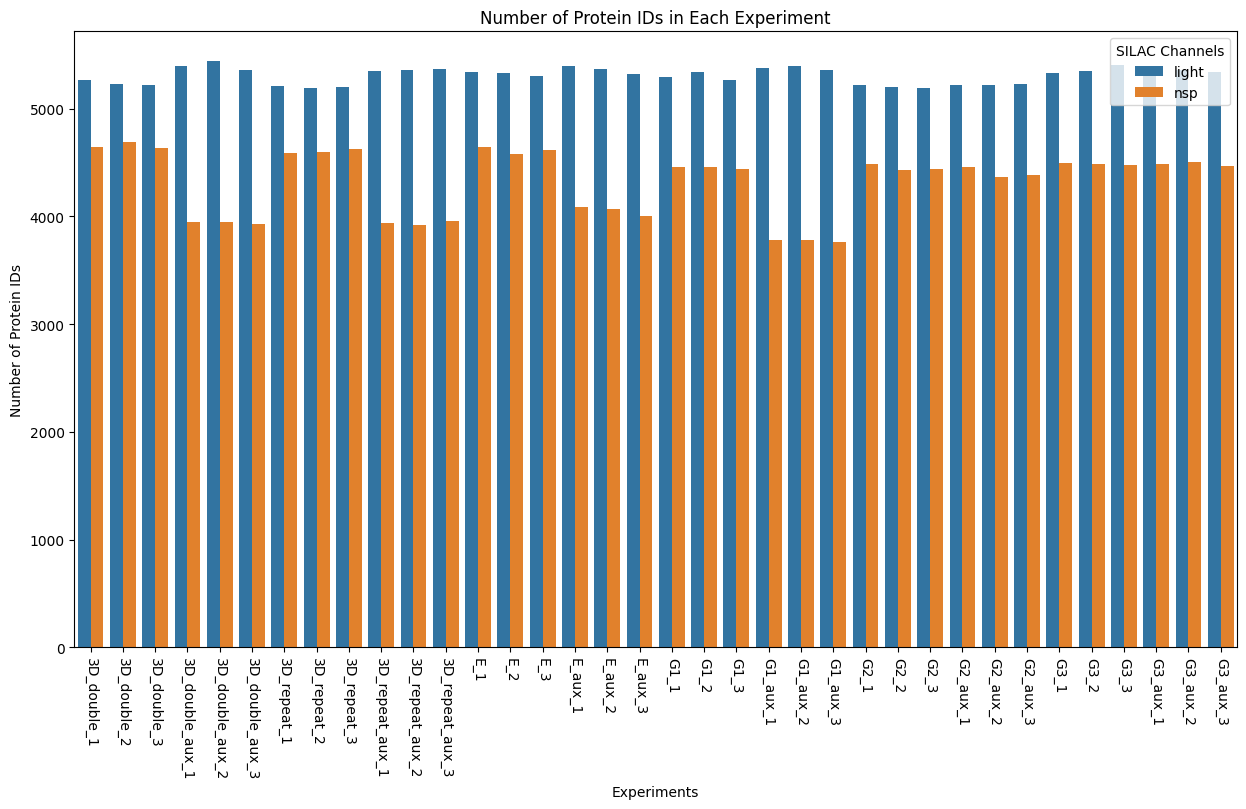

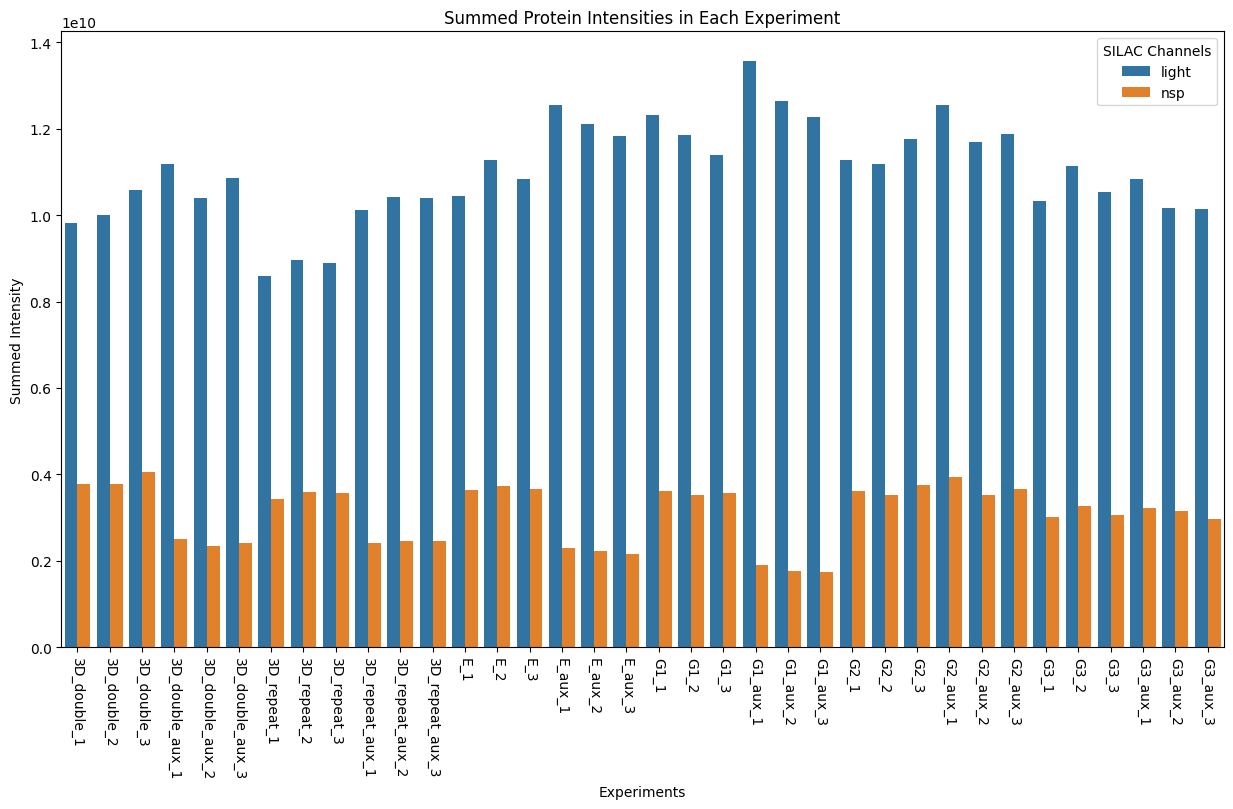

In [71]:
# Plotting with seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='experiment', y='counts', hue='channel')
plt.title('Number of Protein IDs in Each Experiment')
plt.xlabel('Experiments')
plt.ylabel('Number of Protein IDs')
plt.legend(title='SILAC Channels')
plt.xticks(rotation=-90)

plt.show()

# Plotting with seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='experiment', y='total_intensity', hue='channel')
plt.title('Summed Protein Intensities in Each Experiment')
plt.xlabel('Experiments')
plt.ylabel('Summed Intensity')
plt.legend(title='SILAC Channels')
plt.xticks(rotation=-90)
plt.show()


In [10]:
light_counts = light.notna().sum()
nsp_counts = nsp.notna().sum()

NameError: name 'nsp' is not defined

In [9]:
light_counts

Protein.Group      6937
3D_double_1        5264
3D_double_2        5226
3D_double_3        5222
3D_double_aux_1    5396
3D_double_aux_2    5446
3D_double_aux_3    5363
3D_repeat_1        5213
3D_repeat_2        5191
3D_repeat_3        5199
3D_repeat_aux_1    5347
3D_repeat_aux_2    5359
3D_repeat_aux_3    5373
E_1                5338
E_2                5327
E_3                5306
E_aux_1            5395
E_aux_2            5373
E_aux_3            5323
G1_1               5290
G1_2               5338
G1_3               5263
G1_aux_1           5375
G1_aux_2           5392
G1_aux_3           5355
G2_1               5216
G2_2               5199
G2_3               5195
G2_aux_1           5217
G2_aux_2           5224
G2_aux_3           5229
G3_1               5330
G3_2               5348
G3_3               5407
G3_aux_1           5348
G3_aux_2           5358
G3_aux_3           5341
dtype: int64